In [8]:
import nbsetup
import seaborn as sns
import matplotlib.pyplot as plt
from models.load import load_sparc
from models.equations import null_gravity, velocity
from models.sparc.result import Result

In [9]:
sims = load_sparc(namespace='sparc_extended')

In [10]:
def plot_velocities(sim, obs=None, gamma=20, alpha=0.25, ax=None):
    df = sim.dataframe(combined=True)
    r = df['rd']
    # newtonian
    g = sns.lineplot(x=r, y=velocity(r, df['x_vec']), ax=ax, label='newtonian')
    
    # smog
    smog = null_gravity(df['x_vec'], df['F_abs'], gamma, alpha)
    sns.lineplot(x=r, y=velocity(r, smog), ax=ax, label='smog')
    
    g.set(title=sim.name)
    if obs:
        g.errorbar(obs[0], obs[1], yerr=obs[2], ecolor='black', fmt='.k')

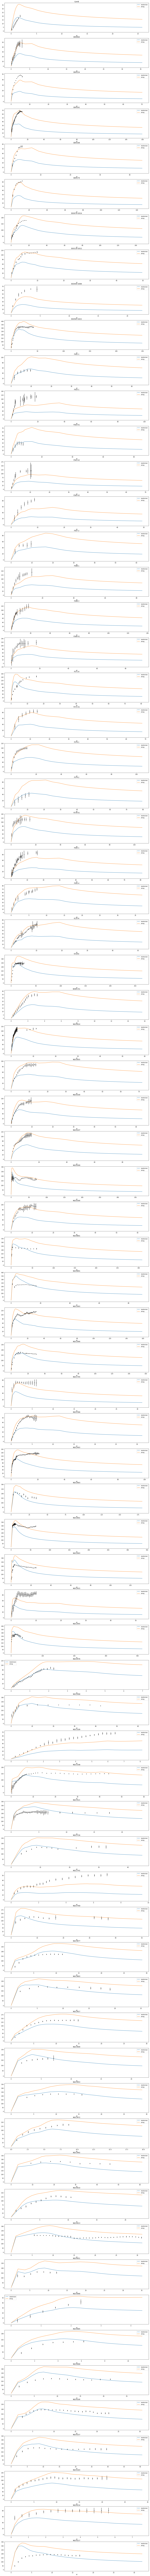

In [11]:
count = #len(sims)
fig, axes = plt.subplots(count, 1, figsize=(20, 5*count))
for i, sim in enumerate(list(sims.values())[:count]):
    rdf = sim.profile.rotmass_df
    plot_velocities(sim, (rdf['R'], rdf['Vobs'], rdf['e_Vobs']), ax=axes[i])

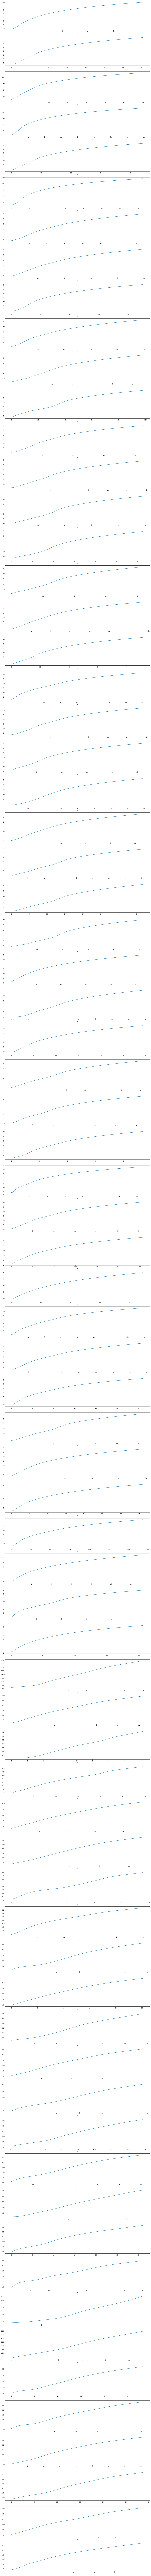

In [12]:
gamma, alpha = 20, 0.25
fig, axes = plt.subplots(count, 1, figsize=(20, 5*count))
for i, sim in enumerate(list(sims.values())[:count]):
    df = sim.dataframe(combined=True)
    df['Pgbar'] = null_gravity(df['x_vec'], df['F_abs'], gamma, alpha)
    df['Sgbar'] = df['x_vec']
    sns.lineplot(x=df['rd'], y=df['Pgbar']/df['Sgbar'], ax=axes[i])